In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<h1>Load data</h1>
<h2>Load input</h2>

In [3]:
#circle
enc_inputs = np.loadtxt('./details/enc_inputs_0.txt')

In [4]:
#ellipse
enc_inputs_ = np.loadtxt('./details/enc_inputs_1.txt')

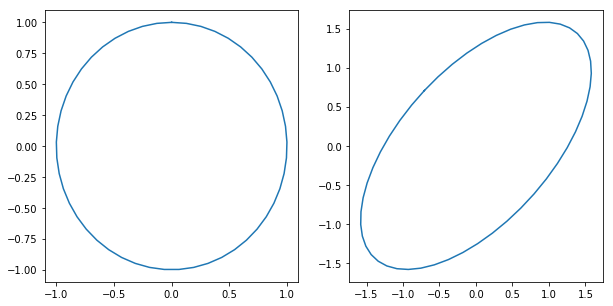

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
ax[0].plot(enc_inputs[:,0],enc_inputs[:,1])
ax[1].plot(enc_inputs_[:,0],enc_inputs_[:,1])
plt.show()

<h2>Load encoder states (training completed)</h2>

In [6]:
#encoder states (circle)
enc_states = np.loadtxt('./details/enc_states_10000_0.txt')

In [7]:
#encoder states (ellipse)
enc_states_ = np.loadtxt('./details/enc_states_10000_1.txt')

<h2>Load decoder states (training completed)</h2>

In [8]:
#decoder states (circle)
dec_states = np.loadtxt('./details/dec_states_10000_0.txt')

In [9]:
#decoder states (ellipse)
dec_states_ = np.loadtxt('./details/dec_states_10000_1.txt')

<h2>Load decoder outputs (training completed)</h2>

In [10]:
#decoder outputs (circle)
dec_outputs = np.loadtxt('./details/dec_outputs_10000_0.txt')

In [11]:
#decoder outputs (ellipse)
dec_outputs_ = np.loadtxt('./details/dec_outputs_10000_1.txt')

<h1>$S$ matrix for Circle</h1>

In [12]:
#concatenate encoder and decoder states
circle = np.concatenate((enc_states,dec_states),axis=0)
#apply svd on centered matrix
_,_,Vt = np.linalg.svd(circle-circle.mean(axis=0))
#dimension reduction to 3D
circle_reduced = np.matmul(circle-circle.mean(axis=0),Vt.T[:,:3])

<h2>Visualize encoder and decoder states (circle)</h2>

<IPython.core.display.Javascript object>


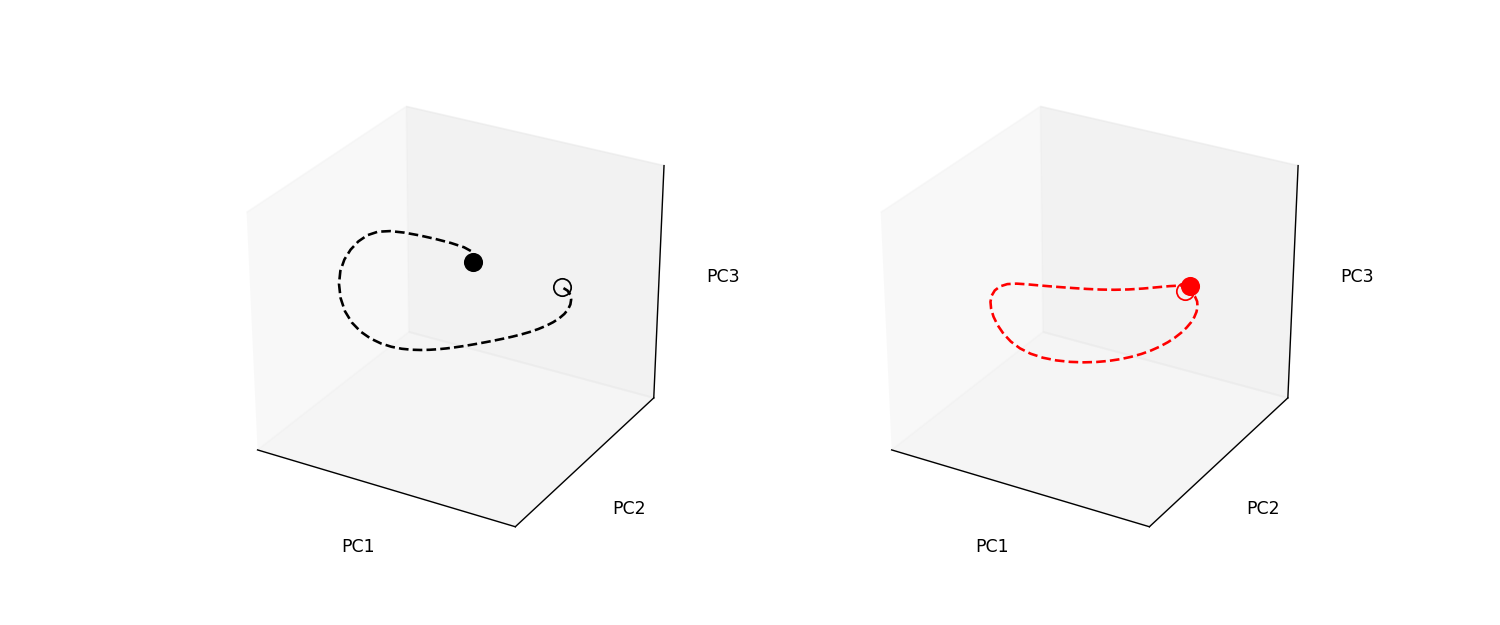

In [13]:
%matplotlib notebook
fig = plt.figure(figsize = (12,5))
#===============
#  Encoder
#===============
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(circle_reduced[:50,0],circle_reduced[:50,1],circle_reduced[:50,2],c='black',linestyle='dashed')
ax.scatter(circle_reduced[0,0],circle_reduced[0,1],circle_reduced[0,2],s=100,c='black')
ax.scatter(circle_reduced[49,0],circle_reduced[49,1],circle_reduced[49,2],s=100,edgecolor='black',facecolors='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

#===============
#  Decoder
#===============
ax = fig.add_subplot(1,2,2,projection='3d')
ax.plot(circle_reduced[50:,0],circle_reduced[50:,1],circle_reduced[50:,2],c='red',linestyle='dashed')
ax.scatter(circle_reduced[50,0],circle_reduced[50,1],circle_reduced[50,2],s=100,c='red')
ax.scatter(circle_reduced[-1,0],circle_reduced[-1,1],circle_reduced[-1,2],s=100,edgecolor='red',facecolors='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

<h1>$S$ matrix for ellipse</h1>

In [14]:
ellipse = np.concatenate((enc_states_,dec_states_),axis=0)
_,_,Vt = np.linalg.svd(ellipse-ellipse.mean(axis=0))
ellipse_reduced = np.matmul(ellipse-ellipse.mean(axis=0),Vt.T[:,:3])

<h2>Visualization for encoder and decoder states (ellipse)</h2>

<IPython.core.display.Javascript object>


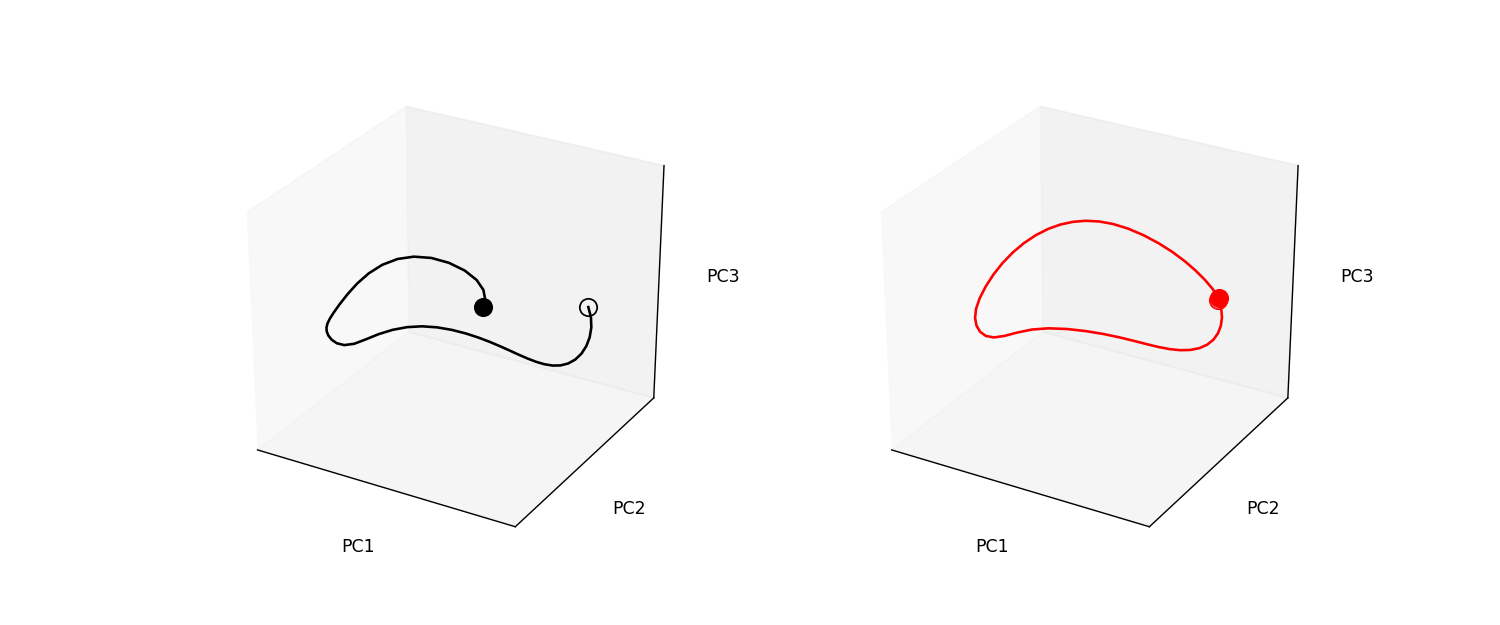

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(12,5))
#===============
#  Encoder
#===============
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(ellipse_reduced[:50,0],ellipse_reduced[:50,1],ellipse_reduced[:50,2],c='black')
ax.scatter(ellipse_reduced[0,0],ellipse_reduced[0,1],ellipse_reduced[0,2],s=100,c='black')
ax.scatter(ellipse_reduced[49,0],ellipse_reduced[49,1],ellipse_reduced[49,2],s=100,edgecolor='black',facecolor='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#===============
#  Decoder
#===============
ax = fig.add_subplot(1,2,2,projection='3d')
ax.plot(ellipse_reduced[50:,0],ellipse_reduced[50:,1],ellipse_reduced[50:,2],c='red')
ax.scatter(ellipse_reduced[50,0],ellipse_reduced[50,1],ellipse_reduced[50,2],s=100,c='red')
ax.scatter(ellipse_reduced[-1,0],ellipse_reduced[-1,1],ellipse_reduced[-1,2],s=100,edgecolor='red',facecolor='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

<h1>$\mathbb{S}$ matrix for circle and ellipse</h1>

In [16]:
mixed = np.concatenate((circle,ellipse),axis=0)
U,S,Vt = np.linalg.svd(mixed-mixed.mean(axis=0))
V = Vt.T
mixed_reduced = np.matmul(mixed-mixed.mean(axis=0),V[:,:3])

<IPython.core.display.Javascript object>


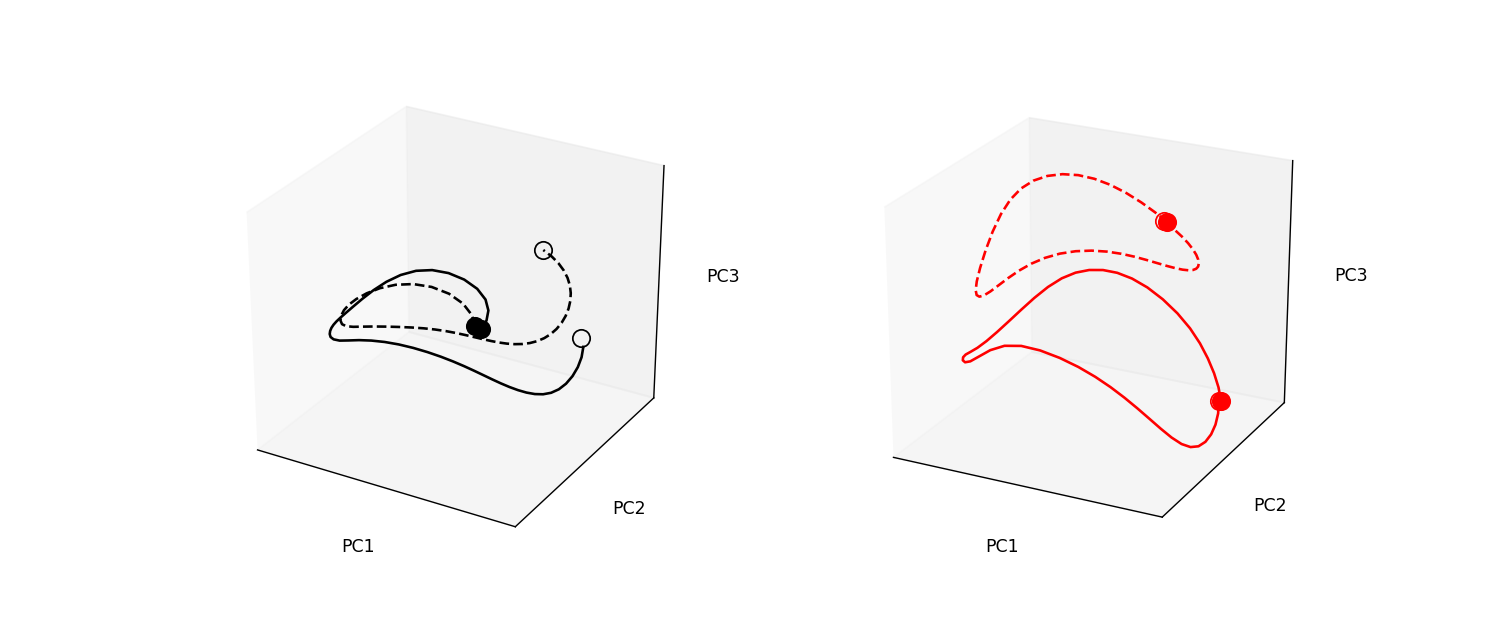

In [17]:
%matplotlib notebook
fig = plt.figure(figsize=(12,5))
#===============
#  Encoder
#Dashed (circle)
#Solid (ellipse)
#===============
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(mixed_reduced[:50,0],mixed_reduced[:50,1],mixed_reduced[:50,2],c='black',linestyle='dashed')
ax.scatter(mixed_reduced[0,0],mixed_reduced[0,1],mixed_reduced[0,2],c='black',s=100)
ax.scatter(mixed_reduced[49,0],mixed_reduced[49,1],mixed_reduced[49,2],s=100,edgecolor='black',facecolor='none')
ax.plot(mixed_reduced[100:150,0],mixed_reduced[100:150,1],mixed_reduced[100:150,2],c='black')
ax.scatter(mixed_reduced[100,0],mixed_reduced[100,1],mixed_reduced[100,2],c='black',s=100)
ax.scatter(mixed_reduced[-1,0],mixed_reduced[-1,1],mixed_reduced[-1,2],s=100,edgecolor='black',facecolor='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#===============
#  Decoder
#Dashed (circle)
#Solid (ellipse)
#===============
ax = fig.add_subplot(1,2,2,projection='3d')
ax.plot(mixed_reduced[50:100,0],mixed_reduced[50:100,1],mixed_reduced[50:100,2],c='red',linestyle='dashed')
ax.scatter(mixed_reduced[50,0],mixed_reduced[50,1],mixed_reduced[50,2],s=100,c='red')
ax.scatter(mixed_reduced[99,0],mixed_reduced[99,1],mixed_reduced[99,2],s=100,edgecolor='red',facecolor='none')
ax.plot(mixed_reduced[150:,0],mixed_reduced[150:,1],mixed_reduced[150:,2],c='red')
ax.scatter(mixed_reduced[150,0],mixed_reduced[150,1],mixed_reduced[150,2],s=100,c='red')
ax.scatter(mixed_reduced[-1,0],mixed_reduced[-1,1],mixed_reduced[-1,2],s=100,edgecolor='red',facecolor='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

<h1>Visualize decoder outputs in 3D</h1>

<IPython.core.display.Javascript object>


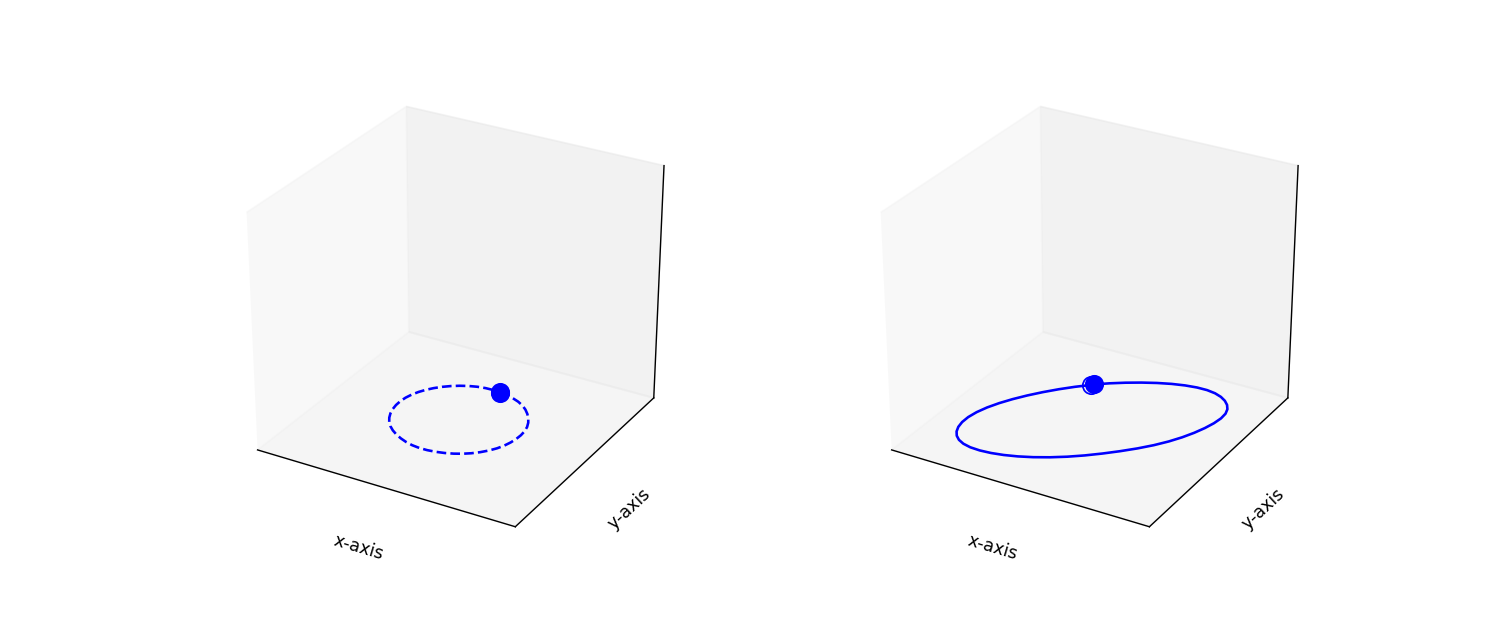

In [18]:
%matplotlib notebook
fig = plt.figure(figsize=(12,5))
#===============
#  Circle (dashed)
#===============
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot(dec_outputs[:,0],dec_outputs[:,1],zs=0,zdir='z',c='blue',linestyle='dashed')
ax.scatter(dec_outputs[0,0],dec_outputs[0,1],zs=0,zdir='z',s=100,c='blue')
ax.scatter(dec_outputs[-1,0],dec_outputs[-1,1],zs=0,zdir='z',s=100,edgecolor='blue',facecolor='none')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(0,0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
#===============
#  Ellipse (solid)
#===============
ax = fig.add_subplot(1,2,2,projection='3d')
ax.plot(dec_outputs_[:,0],dec_outputs_[:,1],zs=0,zdir='z',c='blue')
ax.scatter(dec_outputs_[0,0],dec_outputs_[0,1],zs=0,zdir='z',s=100,c='blue')
ax.scatter(dec_outputs_[-1,0],dec_outputs_[-1,1],zs=0,zdir='z',s=100,edgecolor='blue',facecolor='none')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(0,0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

<h1>Load States/outputs at different iterations</h1>

In [19]:
encoder = {}
decoder = {}
output = {}
itr = [10,100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
for i in range(2):
    encoder[i] = {}
    decoder[i] = {}
    output[i] = {}
    for j,val in enumerate(itr):
        encoder[i][j] = np.loadtxt('./details/enc_states_{1}_{0}.txt'.format(i,val))
        decoder[i][j] = np.loadtxt('./details/dec_states_{1}_{0}.txt'.format(i,val))
        output[i][j] = np.loadtxt('./details/dec_outputs_{1}_{0}.txt'.format(i,val))

<h1>$\mathbb{E}$ and $\mathbb{D}$ at different iterations</h1>

In [20]:
E = {}
D = {}
for k in range(12):
    E[k] = np.concatenate([encoder[i][k] for i in range(2)])
    D[k] = np.concatenate([decoder[i][k] for i in range(2)])

<h1>Visualize changes of Encoder during training</h1>

In [21]:
E_reduced = {}
for i in range(12):
    _,_,Vt = np.linalg.svd(E[i]-E[i].mean(axis=0))
    V = Vt.T
    E_reduced[i] = np.matmul(E[i]-E[i].mean(axis=0),V[:,:3])

<IPython.core.display.Javascript object>


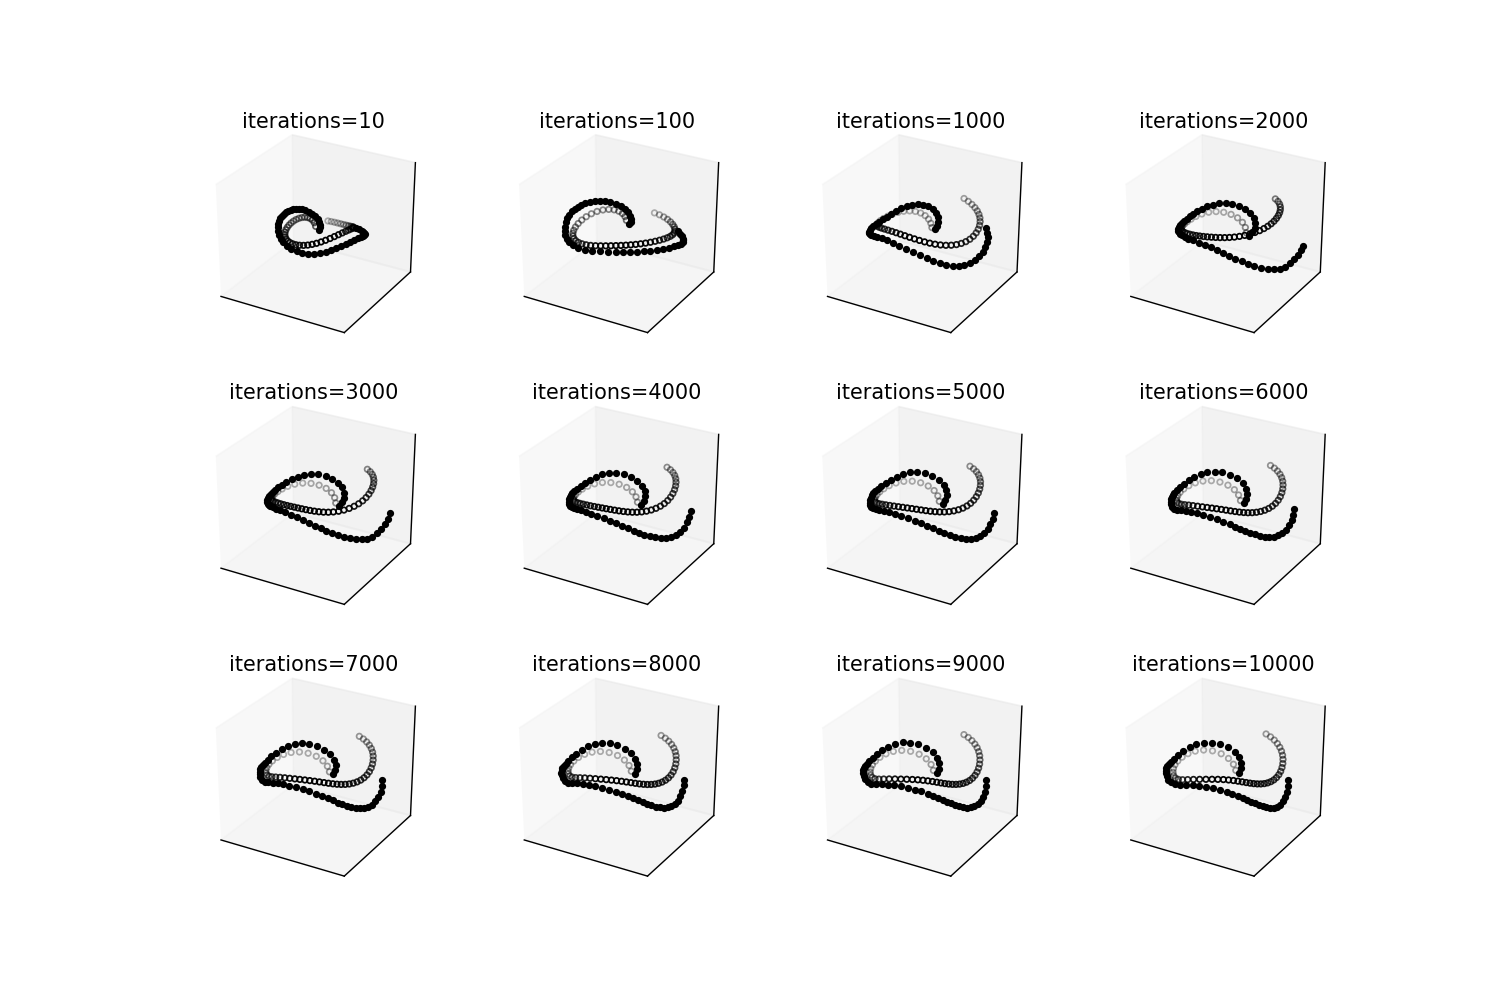

In [22]:
%matplotlib notebook
titles = ['iterations=10','iterations=100','iterations=1000','iterations=2000','iterations=3000','iterations=4000','iterations=5000','iterations=6000','iterations=7000','iterations=8000','iterations=9000','iterations=10000']
fig = plt.figure(figsize=(12,8))
for i in range(12):
    ax = fig.add_subplot(3,4,i+1,projection='3d')
    for j in range(2):
        if j!=0:
            ax.scatter(E_reduced[i][50*j:50*(j+1),0],E_reduced[i][50*j:50*(j+1),1],E_reduced[i][50*j:50*(j+1),2],s=10,c='black',depthshade=False)
        else:
            ax.scatter(E_reduced[i][50*j:50*(j+1),0],E_reduced[i][50*j:50*(j+1),1],E_reduced[i][50*j:50*(j+1),2],s=10,edgecolor='black',facecolor='none')
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(-3,3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_title(titles[i])
plt.show()

<h1>Visualize changes of Decoder during training</h1>

In [23]:
D_reduced = {}
for i in range(12):
    _,_,Vt = np.linalg.svd(D[i]-D[i].mean(axis=0))
    V = Vt.T
    D_reduced[i] = np.matmul(D[i]-D[i].mean(axis=0),V[:,:3])

<IPython.core.display.Javascript object>


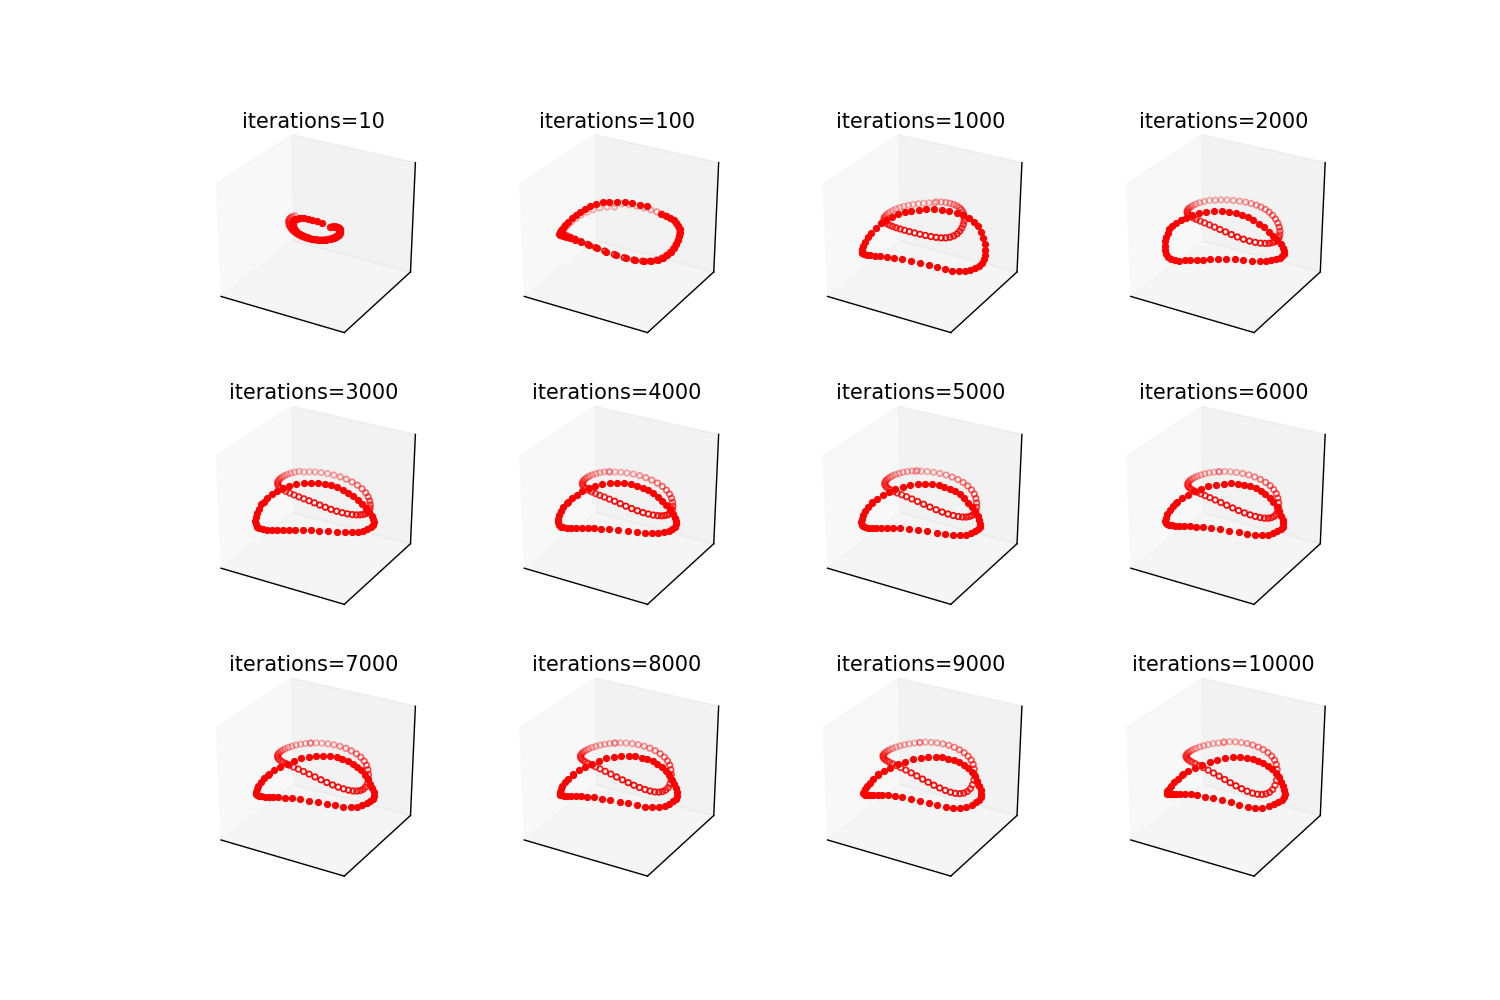

In [24]:
%matplotlib notebook
titles = ['iterations=10','iterations=100','iterations=1000','iterations=2000','iterations=3000','iterations=4000','iterations=5000','iterations=6000','iterations=7000','iterations=8000','iterations=9000','iterations=10000']
fig = plt.figure(figsize=(12,8))
for i in range(12):   
    ax = fig.add_subplot(3,4,i+1,projection='3d')
    for j in range(2):
        if j!=0:
            ax.scatter(D_reduced[i][50*j:50*(j+1),0],D_reduced[i][50*j:50*(j+1),1],D_reduced[i][50*j:50*(j+1),2],s=10,c='red',depthshade=False)
        else:
            ax.scatter(D_reduced[i][50*j:50*(j+1),0],D_reduced[i][50*j:50*(j+1),1],D_reduced[i][50*j:50*(j+1),2],s=10,edgecolor='red',facecolor='none')
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(-3,3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_title(titles[i])
plt.show()

<h1>Visualize changes of Decoder ouput during training</h1>

<IPython.core.display.Javascript object>


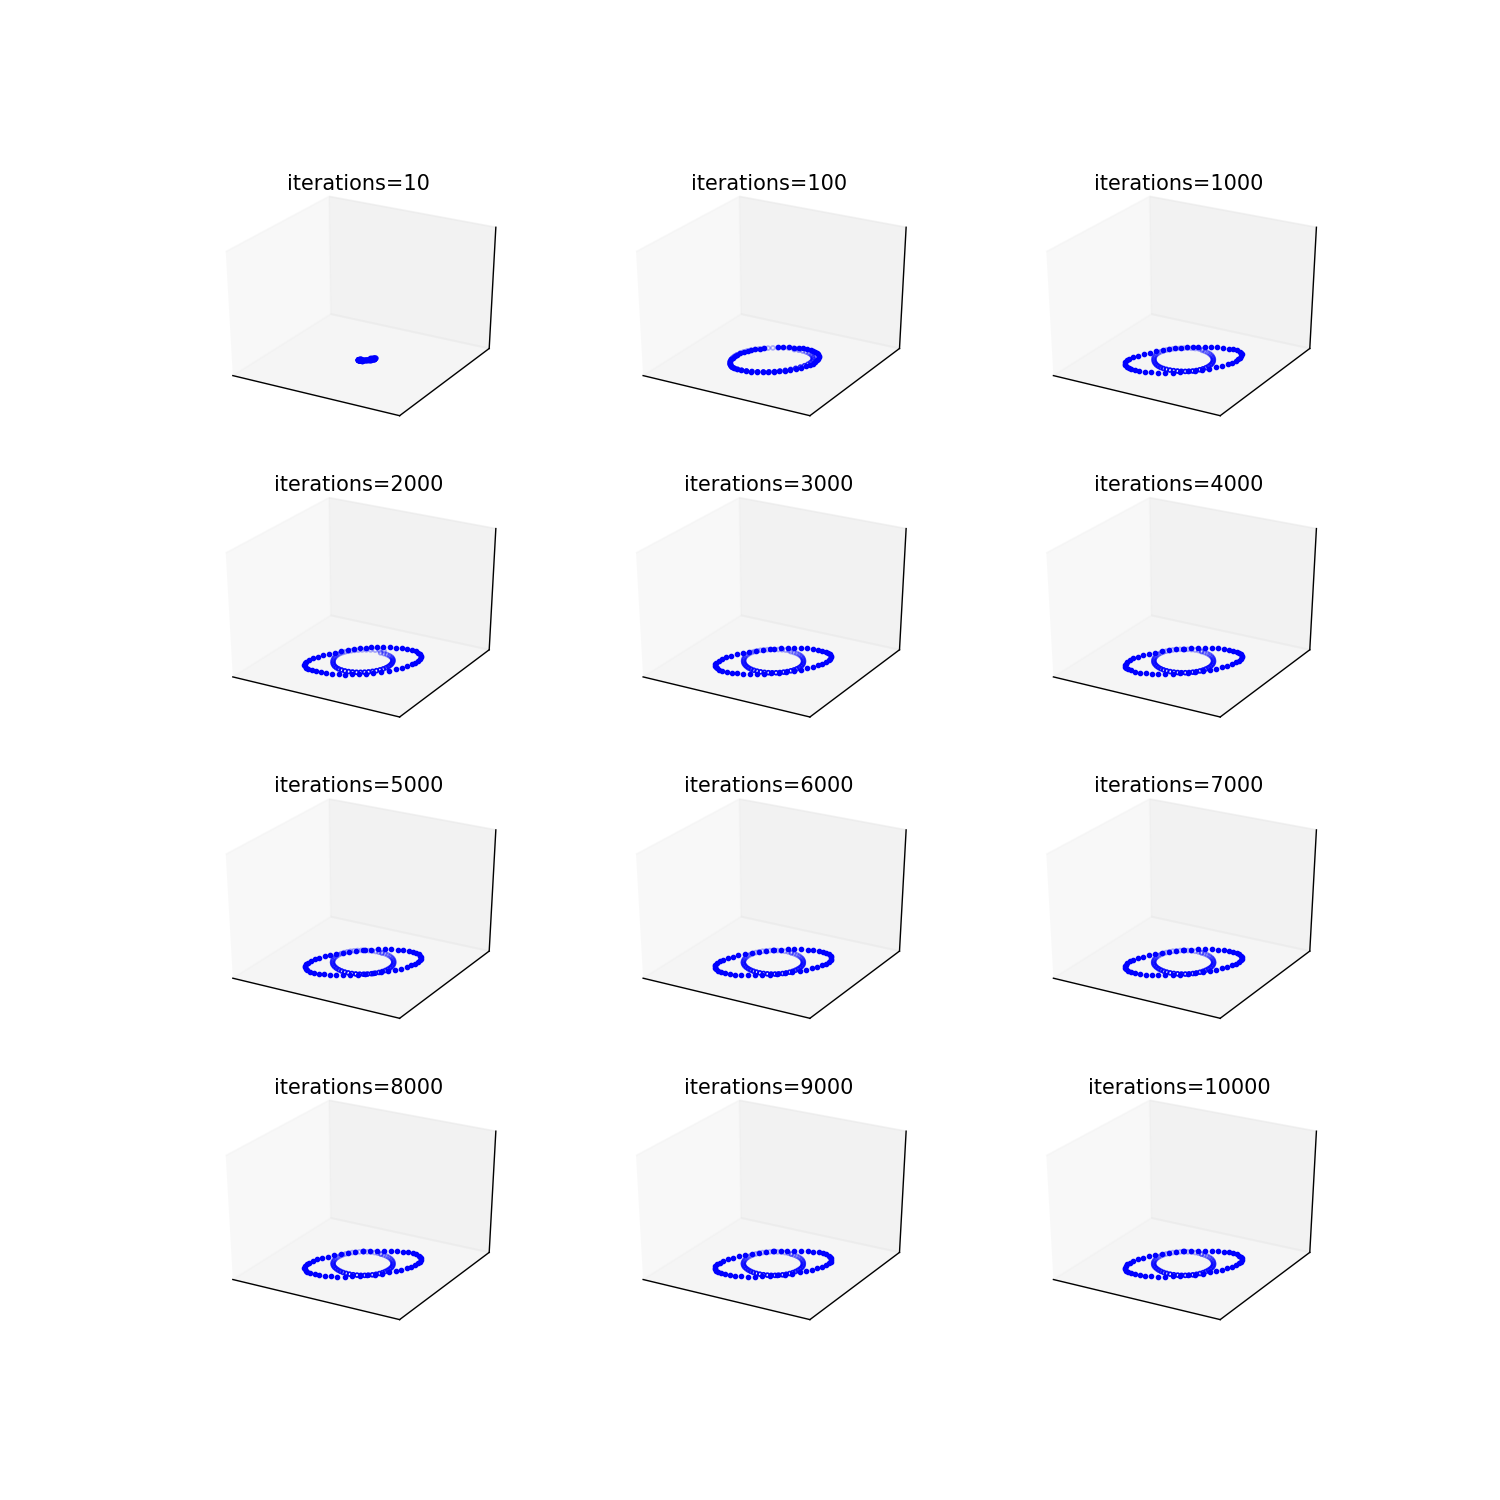

In [25]:
%matplotlib notebook
titles = ['iterations=10','iterations=100','iterations=1000','iterations=2000','iterations=3000','iterations=4000','iterations=5000','iterations=6000','iterations=7000','iterations=8000','iterations=9000','iterations=10000']
fig = plt.figure(figsize=(12,12))
for i in range(12):
    ax = fig.add_subplot(4,3,i+1,projection='3d')
    for j in range(2):
        if j!=0:
            ax.scatter(output[j][i][:,0],output[j][i][:,1],zdir='z',s=5,c='blue',depthshade=False)
        else:
            ax.scatter(output[j][i][:,0],output[j][i][:,1],zdir='z',s=5,edgecolor='blue',facecolor='none')
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_title(titles[i])
plt.show()

<h1>Euclidean distance between Circle and Ellipse</h1>

In [26]:
l2_dist = {}
for i in range(12):
    l2_dist[i] = {}
    for j in range(2):
        for k in range(j+1,2):
            dist_sum = 0.0
            for v in range(50):
                distance = np.linalg.norm(D[i][50*j+v,:]-D[i][50*k+v,:])
                dist_sum +=distance
            dist_sum /=50
            l2_dist[i][(j,k)]=dist_sum
avg_l2_dist = {}
for i in range(12):
    avg_l2_dist[i] = sum(list(l2_dist[i].values()))/float(len(list(l2_dist[i].values())))

<h1>Euclidean distance (centroids) between Circle and Ellipse</h1>

In [27]:
cen_dist = {}
for i in range(12):
    cen_dist[i] = {}
    for j in range(2):
        for k in range(j+1,2):
            center_1 = D[i][50*j:50*(j+1),:].mean(axis=0)
            center_2 = D[i][50*k:50*(k+1),:].mean(axis=0)
            distance = np.linalg.norm(center_1-center_2)
            cen_dist[i][(j,k)] = distance
avg_cen_dist = {}
for i in range(12):
    avg_cen_dist[i] = sum(list(cen_dist[i].values()))/float(len(list(cen_dist[i].values())))

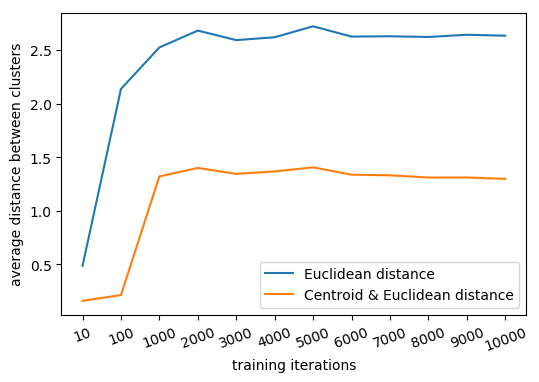

In [28]:
%matplotlib inline
plt.figure(dpi=100)
plt.plot(np.arange(12),list(avg_l2_dist.values()),label='Euclidean distance')
plt.plot(np.arange(12),list(avg_cen_dist.values()),label='Centroid & Euclidean distance')
plt.xticks(np.arange(12),['10','100','1000','2000','3000','4000','5000','6000','7000','8000','9000','10000'],rotation=20)
plt.xlabel('training iterations')
plt.ylabel('average distance between clusters')
plt.legend()
plt.show()